Dataset Link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")


<Figure size 800x500 with 0 Axes>

1.Data Loading and Cleaning: Load the retail sales dataset.


In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day


2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).


In [ ]:
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)
print("Standard Deviation:", std_sales)


Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation: 559.997631555123


3.Time Series Analysis: Analyze sales trends over time using time series techniques.

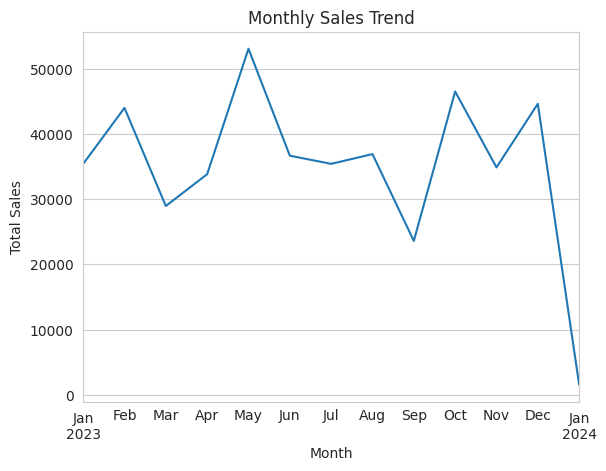

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Customer and Product Analysis

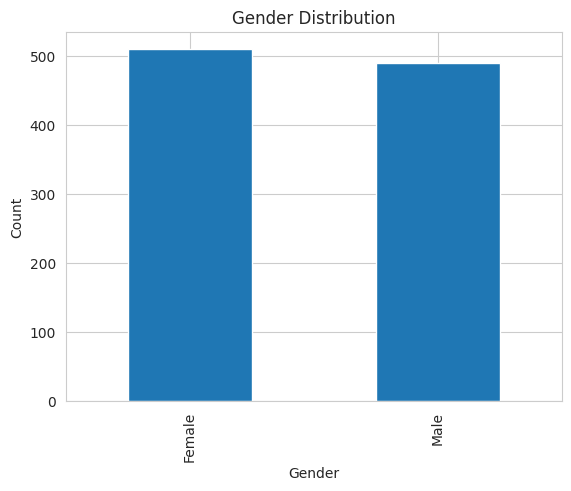

In [ ]:
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


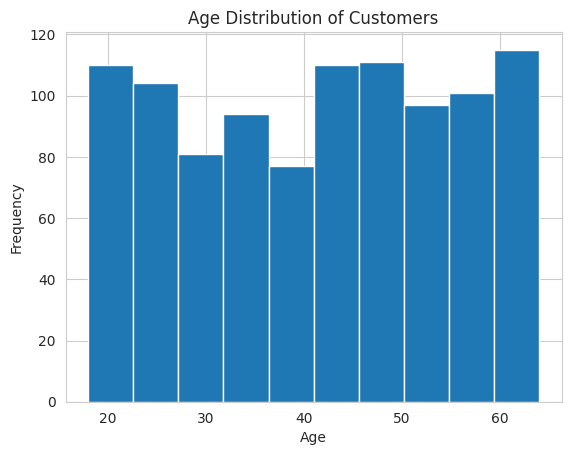

In [ ]:
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


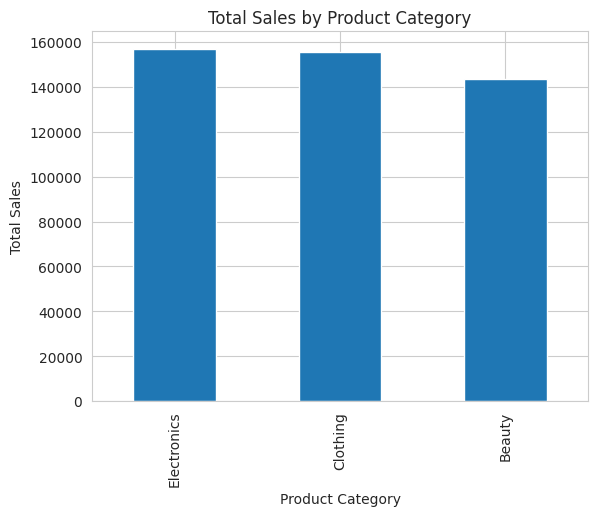

In [ ]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', title='Total Sales by Product Category')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()


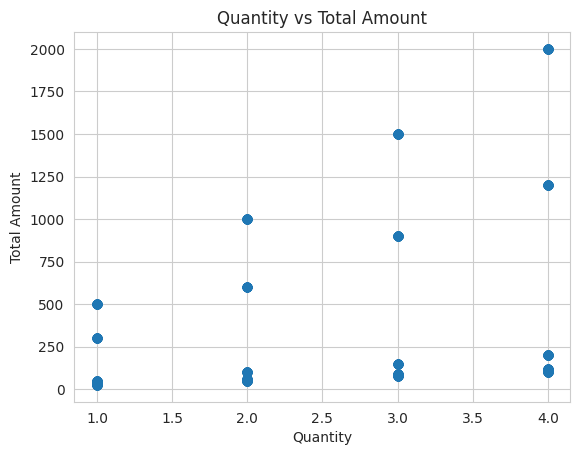

In [ ]:
plt.scatter(df['Quantity'], df['Total Amount'])
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()


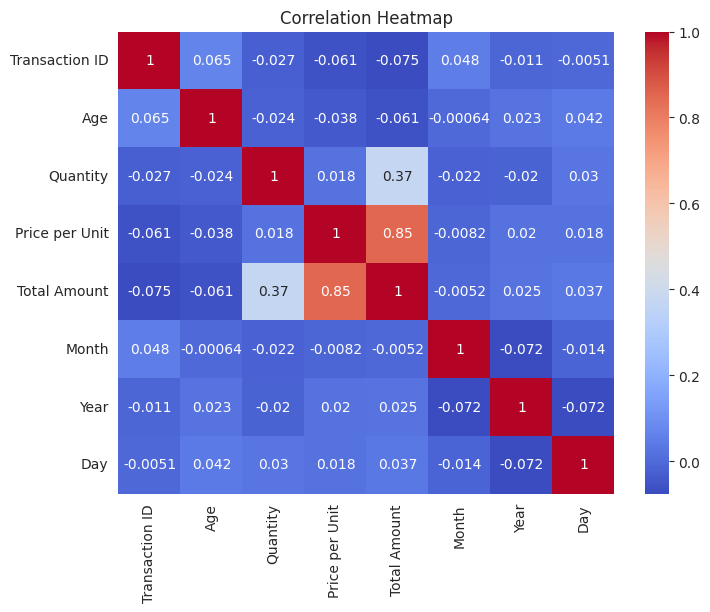

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


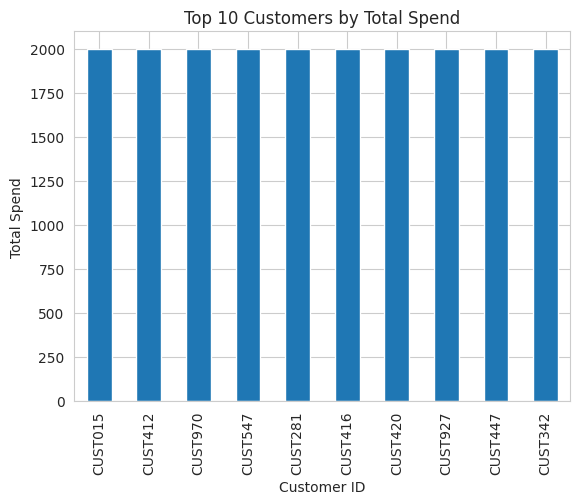

In [ ]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', title='Top 10 Customers by Total Spend')
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()


/tmp/ipython-input-1991395596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum()


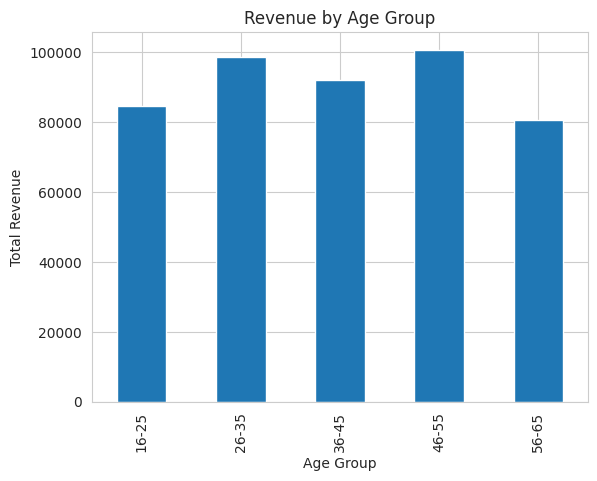

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[15,25,35,45,55,65], labels=['16-25','26-35','36-45','46-55','56-65'])

age_group_sales = df.groupby('Age Group')['Total Amount'].sum()

age_group_sales.plot(kind='bar', title='Revenue by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.show()



 BUSINESS INSIGHTS & RECOMMENDATIONS

1️. Focus marketing campaigns on top-performing product categories.

2️. Reward loyalty programs to Top 10 high-value customers.

3️. Launch personalized offers for the 26–35 and 36–45 age groups.

4️. Increase stock for months with highest sales.

5️. Introduce bundle discounts for high quantity buyers.

